<a href="https://colab.research.google.com/github/Denniskag/Computer-vision-exam/blob/main/CNN_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

training_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Computer vision datasets/data_A/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Computer vision datasets/data_A/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 5638 images belonging to 2 classes.
Found 1408 images belonging to 2 classes.


In [ ]:
def build_resnet():
    resnet = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    x = resnet.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    resnet_model = tf.keras.models.Model(inputs=resnet.input, outputs=predictions)
    resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return resnet_model


def build_mobilenet():
    mobilenet = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    x = mobilenet.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    mobilenet_model = tf.keras.models.Model(inputs=mobilenet.input, outputs=predictions)
    mobilenet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return mobilenet_model


def build_googlenet():
    inception = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    x = inception.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    googlenet_model = tf.keras.models.Model(inputs=inception.input, outputs=predictions)
    googlenet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return googlenet_model

In [ ]:
def train_and_evaluate(model, model_name):
    print(f"Training {model_name}...")
    model.fit(x=training_set, validation_data=test_set, epochs=2)  # Reduced to 2 epochs

    print(f"Evaluating {model_name}...")
    test_set.reset()
    predictions = model.predict(test_set)
    predicted_classes = (predictions > 0.5).astype(int).reshape(-1)
    true_classes = test_set.classes

    cm = confusion_matrix(true_classes, predicted_classes)
    print(f"Confusion Matrix for {model_name}")
    print(cm)

    report = classification_report(true_classes, predicted_classes, target_names=['saloon_car', 'motorcycle'])
    print(f"Classification Report for {model_name}")
    print(report)

    fpr, tpr, thresholds = roc_curve(true_classes, predictions)
    roc_auc = auc(fpr, tpr)
    print(f"AUC for {model_name}: ", roc_auc)

    return fpr, tpr, roc_auc

In [ ]:
resnet = build_resnet()
mobilenet = build_mobilenet()
googlenet = build_googlenet()

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
fpr_resnet, tpr_resnet, roc_auc_resnet = train_and_evaluate(resnet, "ResNet")
fpr_mobilenet, tpr_mobilenet, roc_auc_mobilenet = train_and_evaluate(mobilenet, "MobileNet")
fpr_googlenet, tpr_googlenet, roc_auc_googlenet = train_and_evaluate(googlenet, "GoogleNet")

Training ResNet...
Epoch 1/2
177/177 [==============================] - 4956s 28s/step - loss: 0.2338 - accuracy: 0.9372 - val_loss: 26.0497 - val_accuracy: 0.6925
Epoch 2/2
177/177 [==============================] - 4186s 24s/step - loss: 0.1249 - accuracy: 0.9612 - val_loss: 0.7970 - val_accuracy: 0.6925
Evaluating ResNet...
44/44 [==============================] - 255s 6s/step
Confusion Matrix for ResNet
[[975   0]
 [433   0]]
Classification Report for ResNet
              precision    recall  f1-score   support

  saloon_car       0.69      1.00      0.82       975
  motorcycle       0.00      0.00      0.00       433

    accuracy                           0.69      1408
   macro avg       0.35      0.50      0.41      1408
weighted avg       0.48      0.69      0.57      1408

AUC for ResNet:  0.6680949843074554
Training MobileNet...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/2
177/177 [==============================] - 1170s 7s/step - loss: 0.1422 - accuracy: 0.9549 - val_loss: 18.1961 - val_accuracy: 0.3075
Epoch 2/2
177/177 [==============================] - 1180s 7s/step - loss: 0.0520 - accuracy: 0.9855 - val_loss: 3.3316 - val_accuracy: 0.4062
Evaluating MobileNet...
44/44 [==============================] - 56s 1s/step
Confusion Matrix for MobileNet
[[139 836]
 [  0 433]]
Classification Report for MobileNet
              precision    recall  f1-score   support

  saloon_car       1.00      0.14      0.25       975
  motorcycle       0.34      1.00      0.51       433

    accuracy                           0.41      1408
   macro avg       0.67      0.57      0.38      1408
weighted avg       0.80      0.41      0.33      1408

AUC for MobileNet:  0.9555504234026174
Training GoogleNet...
Epoch 1/2
177/177 [==============================] - 2773s 16s/step - loss: 0.1430 - accuracy: 0.9534 - val_loss: 0.9822 - val_accuracy: 0.9496
Epoch 2/2
177/

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


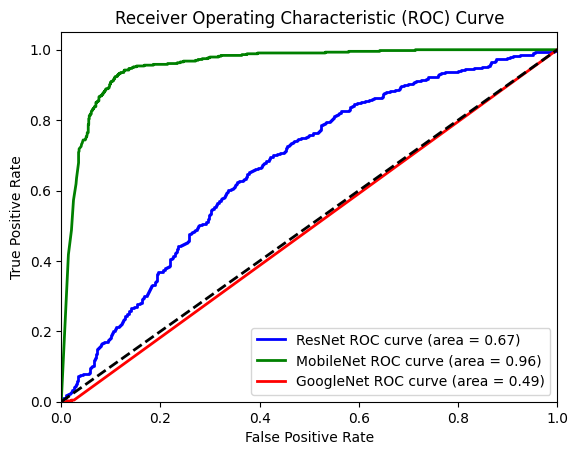

In [ ]:
plt.figure()
plt.plot(fpr_resnet, tpr_resnet, color='blue', lw=2, label='ResNet ROC curve (area = %0.2f)' % roc_auc_resnet)
plt.plot(fpr_mobilenet, tpr_mobilenet, color='green', lw=2, label='MobileNet ROC curve (area = %0.2f)' % roc_auc_mobilenet)
plt.plot(fpr_googlenet, tpr_googlenet, color='red', lw=2, label='GoogleNet ROC curve (area = %0.2f)' % roc_auc_googlenet)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
